# **Lasso Regression**

In [ ]:
import pandas as pd
import numpy as np
import random
import csv
import math
# import numpy package for arrays and stuff
import numpy as np

# import matplotlib.pyplot for plotting our result
import matplotlib.pyplot as plt

# import pandas for importing csv files
import pandas as pd

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,12)
mpl.rcParams['axes.grid'] = False

from sklearn import linear_model

In [ ]:
df = pd.read_csv('/content/Test.csv', parse_dates=['Time'],)
df['Time'] = df['Time'].dt.tz_localize(None)
df = df.fillna(method ='ffill')
df = df.fillna(method ='bfill')

In [ ]:
df['Time'] = pd.to_datetime(df['Time'], infer_datetime_format=True)

In [ ]:
df=df.loc[:, ["Time","Total_Value","Ventilation","Sokets_Plug","Lighting","Other_Electricity","Cooling","Heating"]]
df.reset_index(drop=True, inplace=True) # Replaces the index with integers
df

,Time,Total_Value,Ventilation,Sokets_Plug,Lighting,Other_Electricity,Cooling,Heating
0,2021-05-21 09:00:00,167.250,53.125,16.250,22.375,52.375,13.875,9.25
1,2021-05-21 10:00:00,167.250,53.125,16.250,22.375,52.375,13.875,9.25
2,2021-05-21 11:00:00,34.438,2.500,10.375,10.188,0.000,4.625,6.75
3,2021-05-21 12:00:00,284.250,76.000,24.750,33.125,126.000,17.125,7.25
4,2021-05-21 13:00:00,188.751,53.500,23.313,33.188,61.625,9.875,7.25
...,...,...,...,...,...,...,...,...
716,2021-06-20 05:00:00,328.688,84.875,22.750,14.938,0.000,200.125,6.00
717,2021-06-20 06:00:00,328.688,84.875,22.750,14.938,0.000,200.125,6.00
718,2021-06-20 07:00:00,328.688,84.875,22.750,14.938,0.000,200.125,6.00
719,2021-06-20 08:00:00,328.688,84.875,22.750,14.938,0.000,200.125,6.00


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fecfd8a9e10>,
      dtype=object)

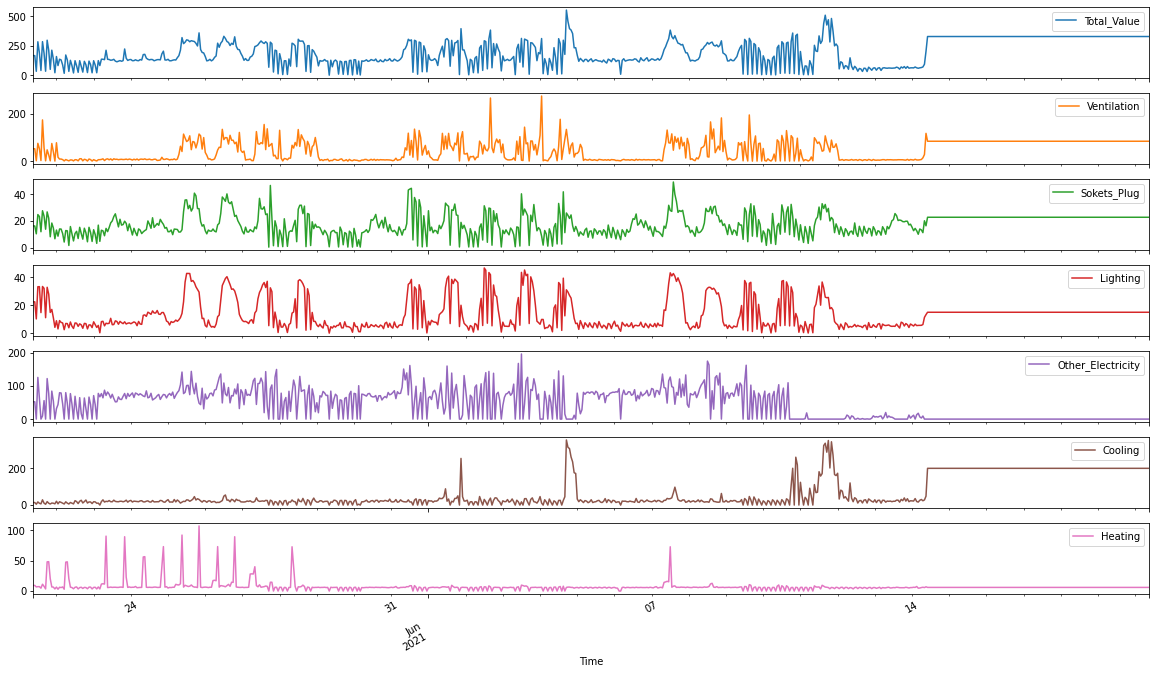

In [ ]:
# VISUALIZING THE FEATURES AGAINST TIME
df.set_index('Time')[["Total_Value","Ventilation","Sokets_Plug","Lighting","Other_Electricity","Cooling","Heating"]].plot(subplots=True)

In [ ]:
X = df.iloc[:, 0:2]
X['Year'] = X['Time'].dt.year
X['Month']=X['Time'].dt.month
X['Day']=X['Time'].dt.day
X['Hour']=X['Time'].dt.hour
X.drop('Time', inplace=True, axis=1)
X

,Total_Value,Year,Month,Day,Hour
0,167.250,2021,5,21,9
1,167.250,2021,5,21,10
2,34.438,2021,5,21,11
3,284.250,2021,5,21,12
4,188.751,2021,5,21,13
...,...,...,...,...,...
716,328.688,2021,6,20,5
717,328.688,2021,6,20,6
718,328.688,2021,6,20,7
719,328.688,2021,6,20,8


In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X = sc.fit_transform(X)

In [ ]:
Y1 = df.iloc[:, 2:8]
Y1

,Ventilation,Sokets_Plug,Lighting,Other_Electricity,Cooling,Heating
0,53.125,16.250,22.375,52.375,13.875,9.25
1,53.125,16.250,22.375,52.375,13.875,9.25
2,2.500,10.375,10.188,0.000,4.625,6.75
3,76.000,24.750,33.125,126.000,17.125,7.25
4,53.500,23.313,33.188,61.625,9.875,7.25
...,...,...,...,...,...,...
716,84.875,22.750,14.938,0.000,200.125,6.00
717,84.875,22.750,14.938,0.000,200.125,6.00
718,84.875,22.750,14.938,0.000,200.125,6.00
719,84.875,22.750,14.938,0.000,200.125,6.00


In [ ]:
X.shape, Y1.shape

((721, 5), (721, 6))

In [ ]:
# Y1

In [ ]:
X.shape, Y1.shape

((721, 5), (721, 6))

In [ ]:
# Y1 = np.asarray(Y1).reshape(-1)
# X = np.asarray(X)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y1, test_size = 0.3,random_state=42)

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((504, 5), (504, 6), (217, 5), (217, 6))

**Using Lasso Regression**

In [ ]:
lassoReg = linear_model.Lasso(alpha=0.1)
rfr = lassoReg.fit(X_train,Y_train)

In [ ]:
pred = rfr.predict(X_test)
pred

array([[ 27.91342248,  13.64487197,  13.59696531,  81.21954684,
         -3.33158357,   6.72058075],
       [ 88.78975283,  25.93103154,  19.82925879,   7.65662915,
        180.63321193,   6.85239474],
       [ 25.88362534,  15.60417052,  13.53088084,  73.31985944,
         -6.58016485,  11.16166588],
       ...,
       [ 83.52287135,  24.34894341,  17.87183126,  25.86272442,
        169.59842459,   8.03628581],
       [ 63.00409087,  20.91998004,  22.82375254,  66.93222472,
         52.5788524 ,   7.7494037 ],
       [ 67.45424677,  21.8126088 ,  20.50428421,  44.10507714,
         92.1910423 ,   7.01653001]])

In [ ]:
Y_test=Y_test.to_numpy()
Y_test

array([[  5.875,  13.   ,   7.875,  87.25 ,  22.   ,   5.75 ],
       [ 84.875,  22.75 ,  14.938,   0.   , 200.125,   6.   ],
       [  6.625,  22.375,  15.938,  57.75 ,  24.813,   6.   ],
       ...,
       [ 84.875,  22.75 ,  14.938,   0.   , 200.125,   6.   ],
       [ 71.   ,  21.438,  20.   , 100.938,  16.625,   6.25 ],
       [ 48.25 ,  19.188,  24.75 , 139.063,  16.75 ,   6.   ]])

**MAE Calculation**

In [ ]:
# calculating mean absolute error
def metrics(predictions, Y_test):
    MAE = np.mean(np.abs(predictions-Y_test))
    return MAE

In [ ]:
mae = metrics(pred, Y_test)
print("Mean Absolute Error is: ", mae)

Mean Absolute Error is:  14.267104263218899


Ventillation

In [ ]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = Y_test[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

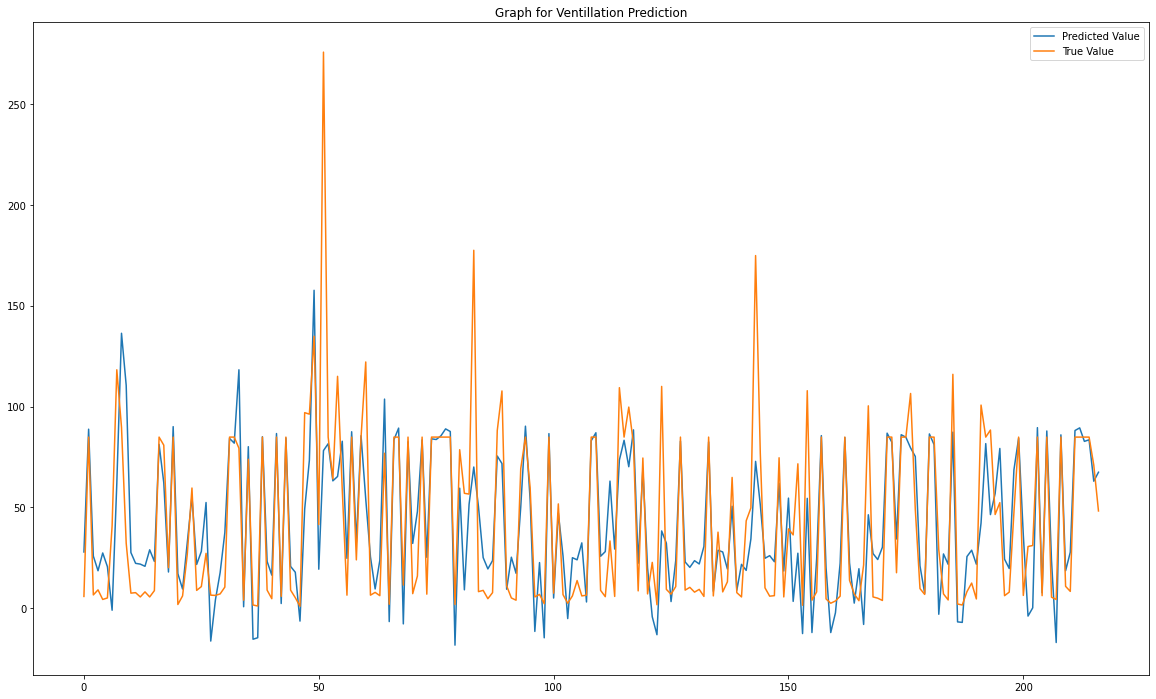

In [ ]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

Socket Plugs

In [ ]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = Y_test[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

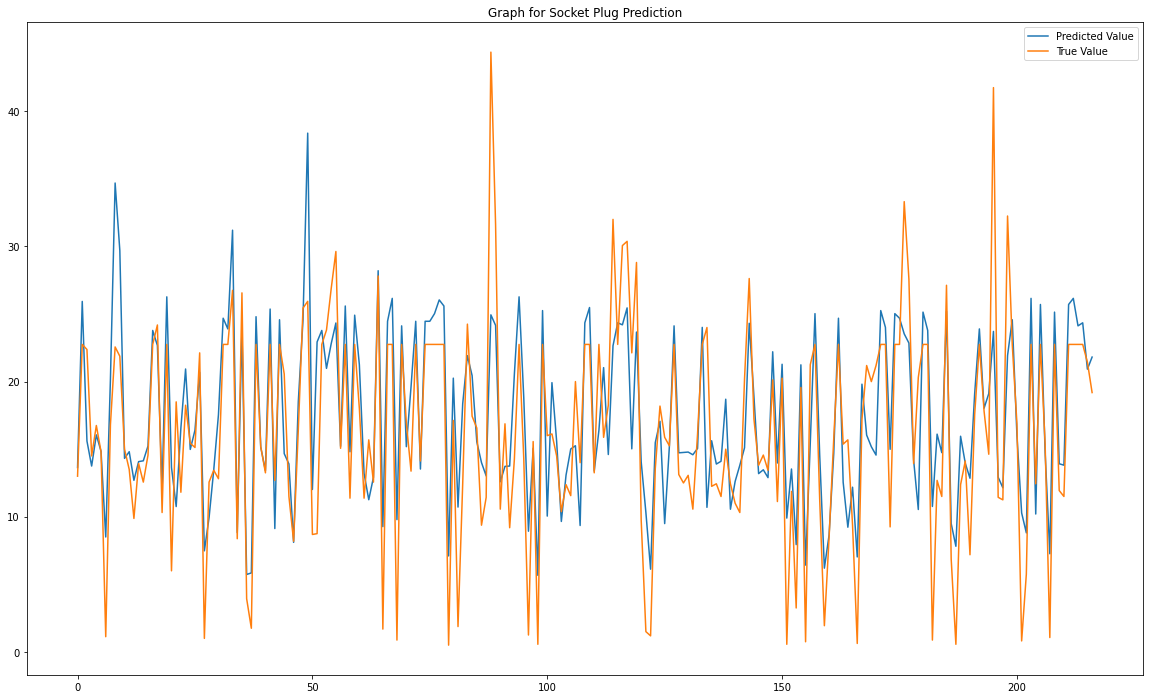

In [ ]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

Lighting

In [ ]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = Y_test[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

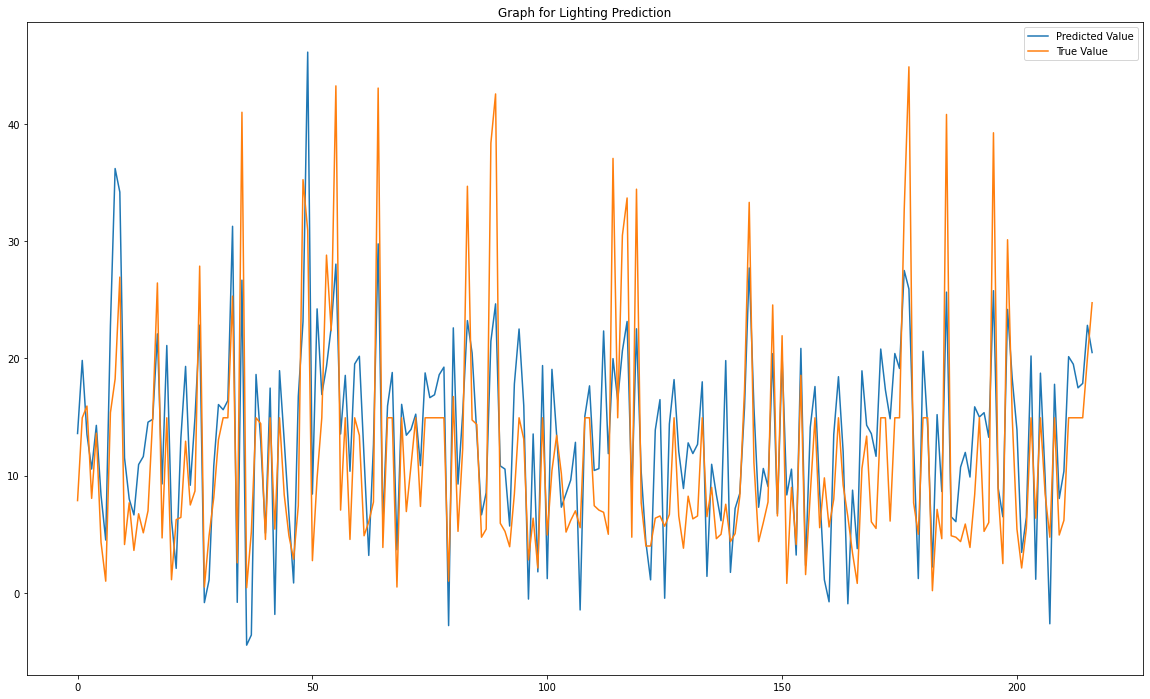

In [ ]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

Other Electricity

In [ ]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = Y_test[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

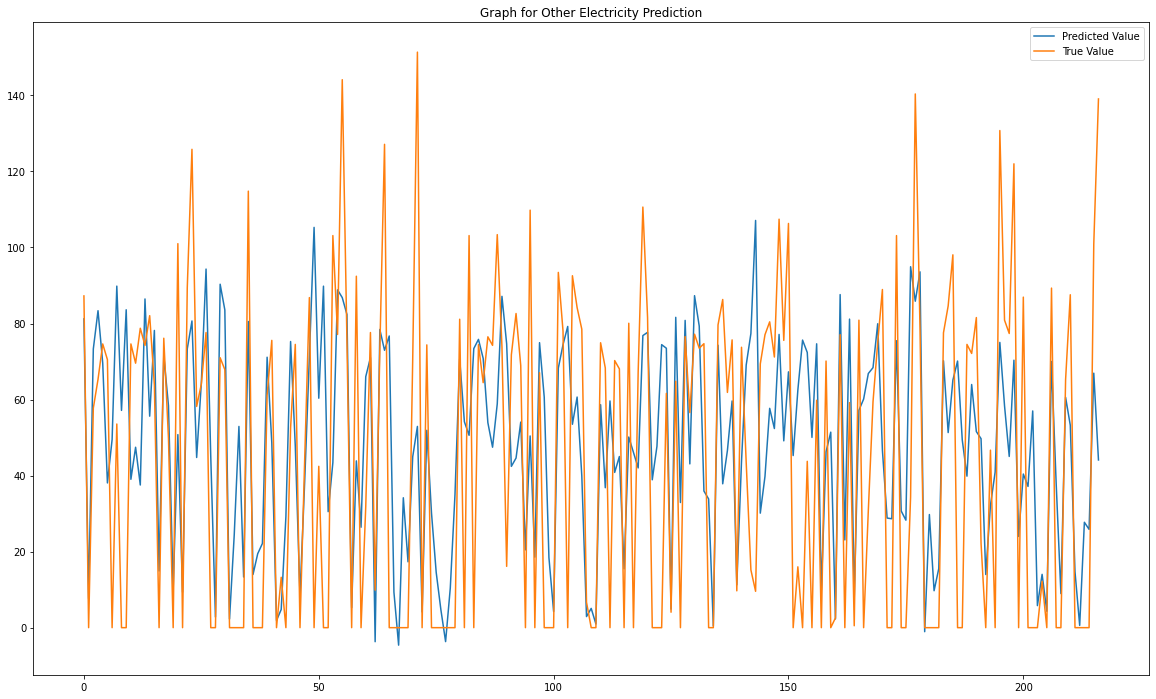

In [ ]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

Cooling

In [ ]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = Y_test[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

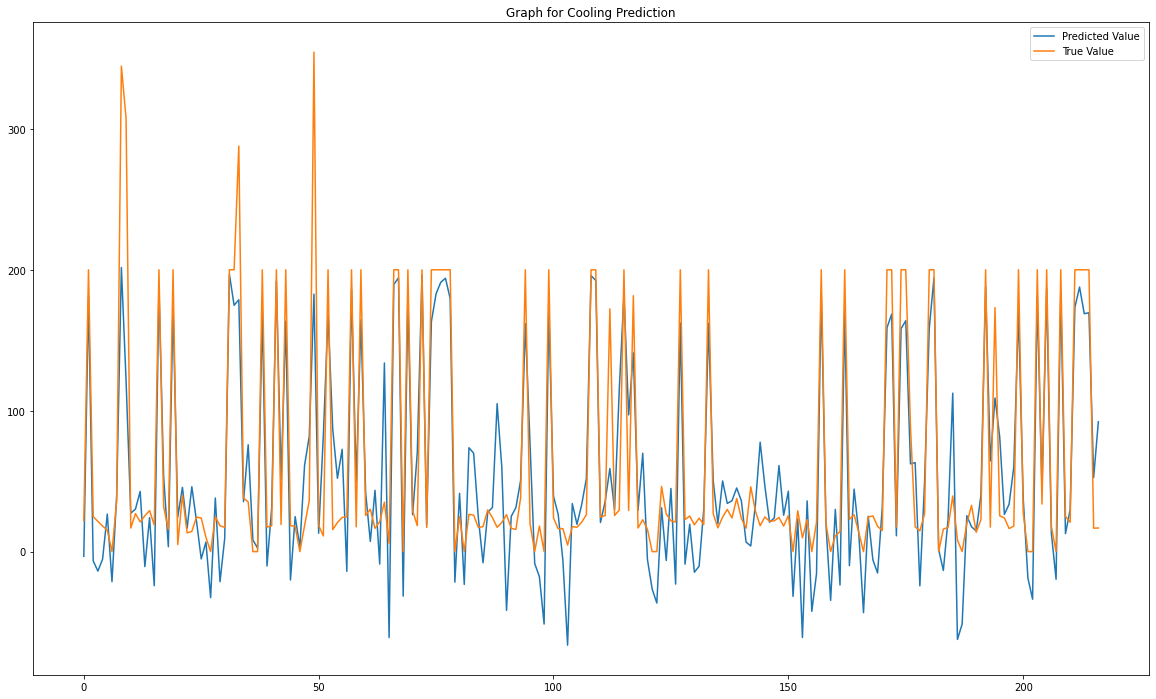

In [ ]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

Heating

In [ ]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = Y_test[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

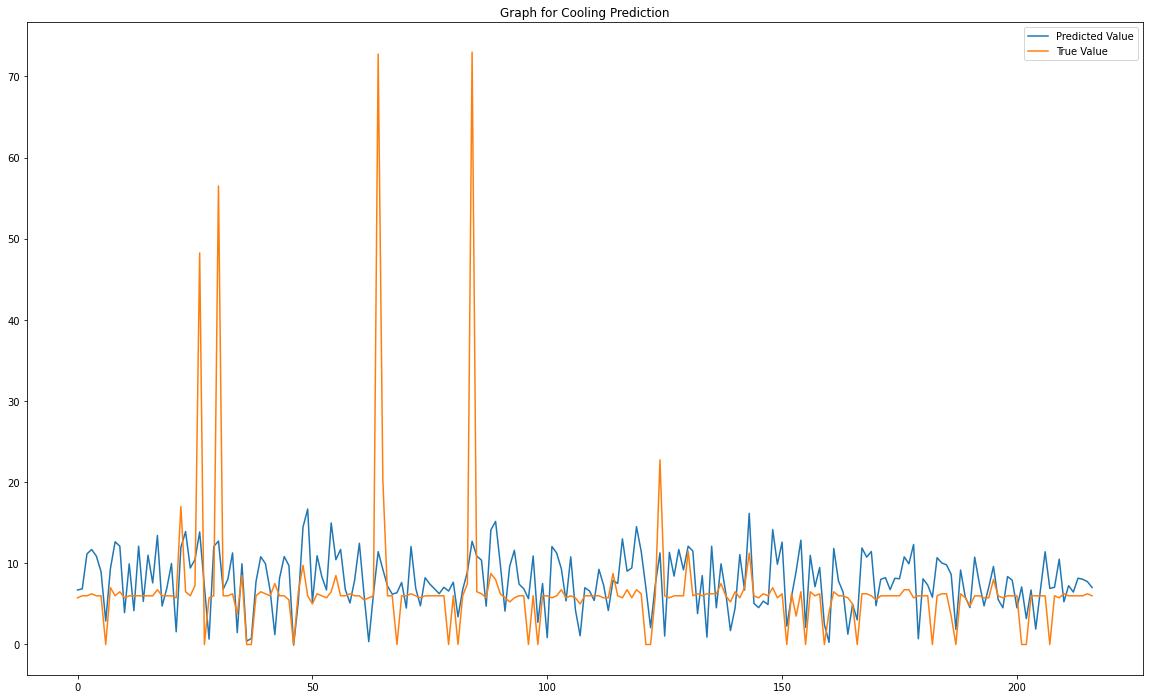

In [ ]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

# **REFERENCES**


1) https://www2.lawrence.edu/fast/GREGGJ/Python/numpy/numpyLA.html

2) https://medium.com/analytics-vidhya/multiple-linear-regression-from-scratch-using-only-numpy-*98fc010a1926*